Import modul and library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_excel("https://docs.google.com/spreadsheets/d/1G30eCRoP5hPib3IvDqxAejh4OQwsOCKZ/export?format=xlsx")

In [3]:
df.head(5)

,Unnamed: 0,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,0,15658,Srinagar,Parimpore,Grapes,Other,Medium,9000.0,10000.0,9500.0,2021-03-15
1,1,17218,kapurthala,Phagwara,Grapes,Other,Medium,3000.0,5714.0,4175.0,2021-03-15
2,2,14673,Meerut,Meerut,Grapes,White,Medium,4870.0,4950.0,4900.0,2021-03-15
3,3,13304,Amethi,Sultanpur,Grapes,Green,Medium,4000.0,4100.0,4050.0,2021-03-15
4,4,14683,Rohtak,Meham,Grapes,Other,Medium,3500.0,4500.0,4000.0,2021-03-15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94472 entries, 0 to 94471
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 94472 non-null  int64         
 1   Sl no.                     94472 non-null  int64         
 2   District Name              94472 non-null  object        
 3   Market Name                94472 non-null  object        
 4   Commodity                  94472 non-null  object        
 5   Variety                    94472 non-null  object        
 6   Grade                      94472 non-null  object        
 7   Min Price (Rs./Quintal)    94472 non-null  int64         
 8   Max Price (Rs./Quintal)    94472 non-null  int64         
 9   Modal Price (Rs./Quintal)  94472 non-null  float64       
 10  Price Date                 94472 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage:

dari semua varietas, grade, kelompokkan menjadi satu dan hitung rata-ratanya

In [4]:
grouped_df0 = df.groupby('Price Date')['Modal Price (Rs./Quintal)'].mean()

In [ ]:
grouped_df0

,Modal Price (Rs./Quintal)
Price Date,
2021-03-15,4676.566176
2021-03-16,4449.123288
2021-03-17,4608.066176
2021-03-18,4402.817518
2021-03-19,4453.194245
...,...
2024-10-27,9269.696970
2024-10-28,9396.481481
2024-10-29,9307.058824


In [ ]:
type(grouped_df0)

pandas.core.series.Series

Download grouped_df untuk digunakan pada saat deployment

In [ ]:
#grouped_df.to_excel('grouped_prices_banana.xlsx', sheet_name='Prices')

Tinjau grafik harga dari harga komoditas tersebut untuk melihat trend secara kasat mata

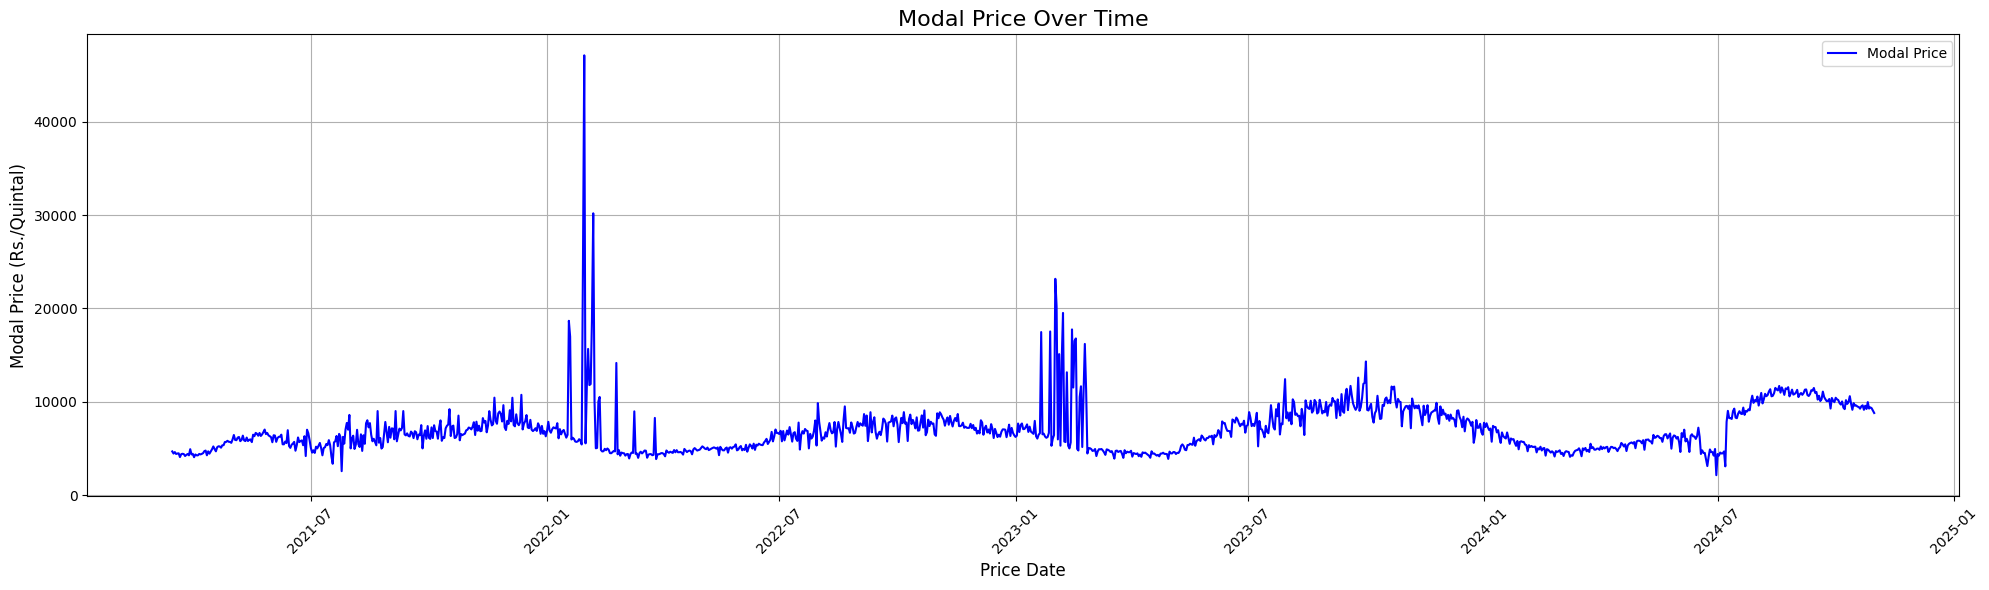

In [ ]:
# Plot the Modal Price against the Price Date
plt.figure(figsize=(20, 6))  # You can adjust the figure size
plt.plot(grouped_df0.index, grouped_df0, label='Modal Price', color='blue')

# Add title and labels
plt.title('Modal Price Over Time', fontsize=16)
plt.xlabel('Price Date', fontsize=12)
plt.ylabel('Modal Price (Rs./Quintal)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
# Define the split time
split1 = 8*2*30
split2 = 16*2*30

# Get the train set
time_train = grouped_df0.index[:split1]
x_train = grouped_df0[:split1]

# Get the validation set
time_valid = grouped_df0.index[split1:split2]
x_valid = grouped_df0[split1:split2]

# Get the test set
time_test = grouped_df0.index[split2:]
x_test = grouped_df0[split2:]

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
x_train_scaled = scaler.fit_transform(x_train.values.reshape(-1,1))
x_val_scaled = scaler.transform(x_valid.values.reshape(-1,1))
x_test_scaled = scaler.transform(x_test.values.reshape(-1,1))

# Convert the scaled data back into a DataFrame for easier reading
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=[x_train.name],index=x_train.index)
x_val_scaled_df = pd.DataFrame(x_val_scaled,  columns=[x_valid.name],index=x_valid.index)
x_test_scaled_df = pd.DataFrame(x_test_scaled,  columns=[x_test.name],index=x_test.index)

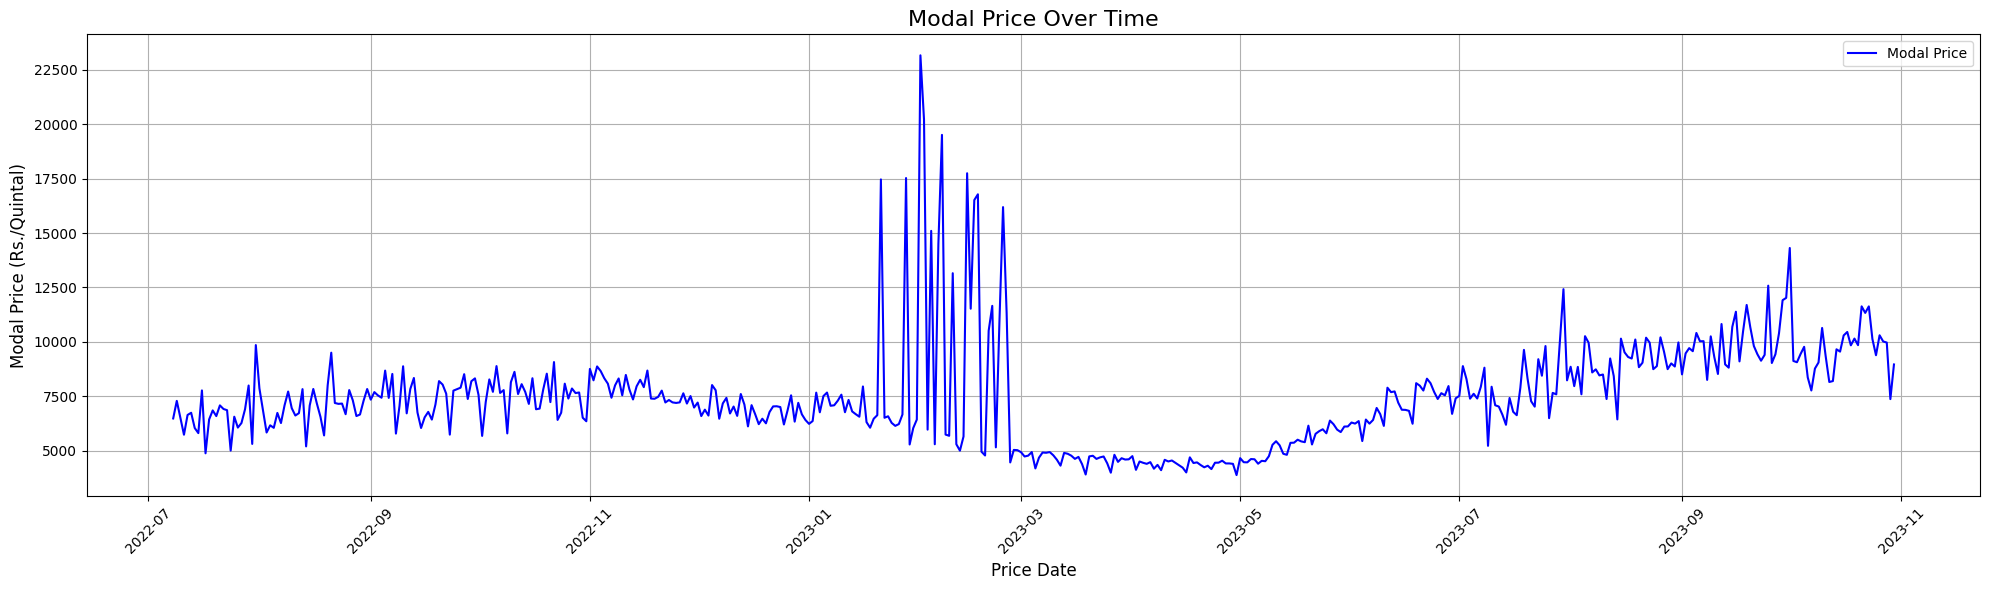

In [ ]:
# Plot the Modal Price against the Price Date
plt.figure(figsize=(20, 6))  # You can adjust the figure size
plt.plot(time_valid, x_valid, label='Modal Price', color='blue')

# Add title and labels
plt.title('Modal Price Over Time', fontsize=16)
plt.xlabel('Price Date', fontsize=12)
plt.ylabel('Modal Price (Rs./Quintal)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

#Naive Forecast

In [ ]:
series = np.array(grouped_df0)

In [ ]:
series = scaler.transform(series.reshape(-1,1))

In [ ]:
# Generate the naive forecast
split_time = split2
naive_forecast = series[split_time-1 :-1]

# Define time step
time_step = 100

# Print values
print(f'ground truth at time step {time_step}: {x_test_scaled[time_step]}')
print(f'prediction at time step {time_step + 1}: {naive_forecast[time_step +1]}')


ground truth at time step 100: [-0.37825052]
prediction at time step 101: [-0.37825052]


In [ ]:
len(x_test_scaled)

367

In [ ]:
len(naive_forecast)

367

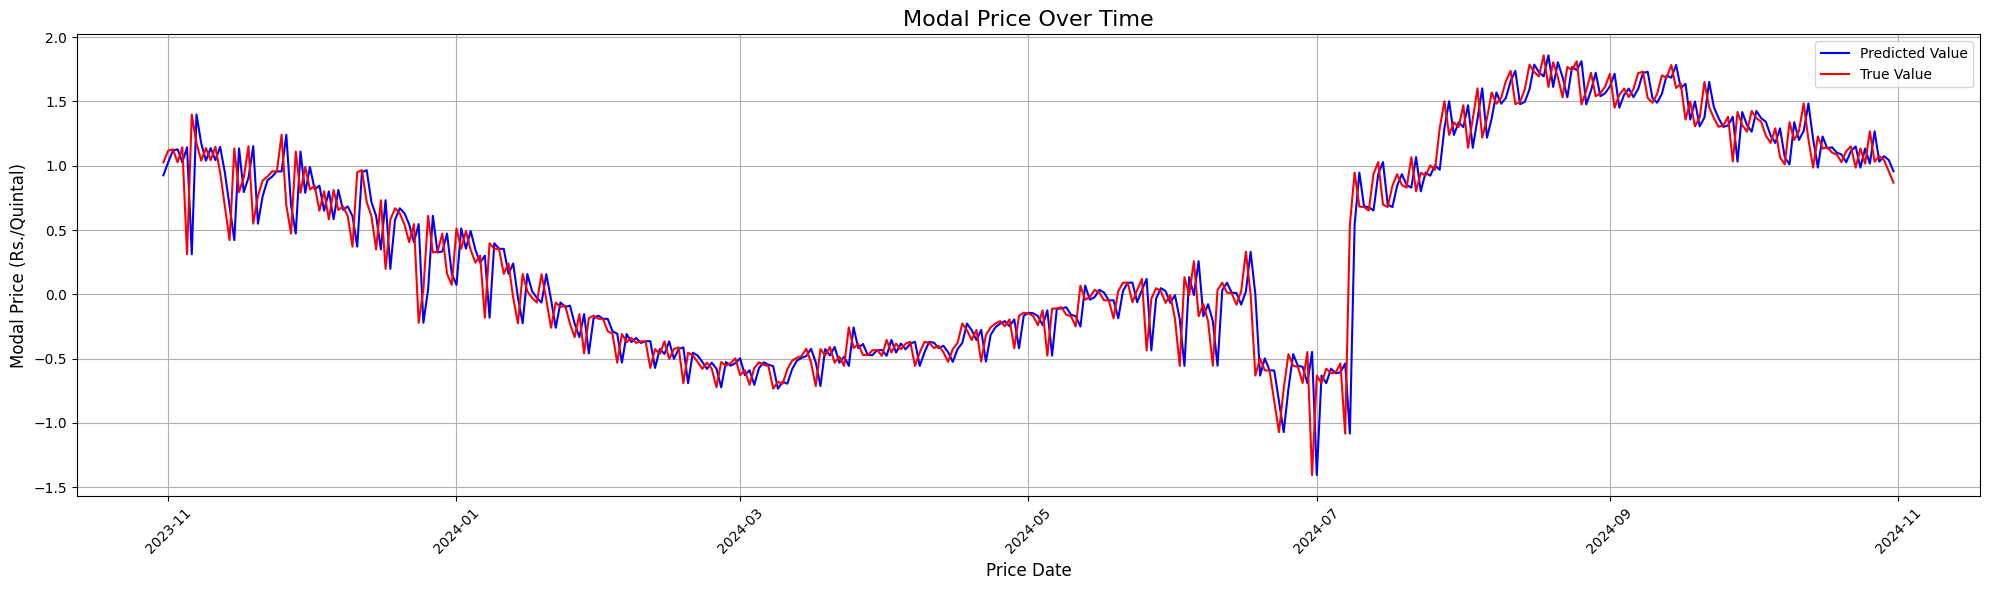

In [ ]:
# Reshape results to be 2D (as scaler.inverse_transform expects a 2D array)
#results_reshaped = results.reshape(-1, 1)

# Plot the Modal Price against the Price Date
plt.figure(figsize=(20, 6))  # You can adjust the figure size
plt.plot(x_test_scaled_df.index, naive_forecast, label='Predicted Value', color='blue')

# Plot the predicted values (after reshaping)
plt.plot(x_test_scaled_df.index, x_test_scaled, label='True Value', color='red')

# Add title and labels
plt.title('Modal Price Over Time', fontsize=16)
plt.xlabel('Price Date', fontsize=12)
plt.ylabel('Modal Price (Rs./Quintal)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
# Instantiate metric objects
mse = tf.keras.metrics.MeanSquaredError()
mae = tf.keras.metrics.MeanAbsoluteError()

# Compute the metrics
print("MSE:", mse(x_test_scaled, naive_forecast).numpy())
print("MAE:", mae(x_test_scaled, naive_forecast).numpy())

naive_mse = mse(x_test_scaled, naive_forecast).numpy()
naive_mae = mae(x_test_scaled, naive_forecast).numpy()

MSE: 0.057010002
MAE: 0.16032042


In [ ]:
# Parameters
window_size = 30
batch_size = 32

In [ ]:
def windowed_dataset(series, window_size, batch_size):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    #dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size)

    # Optimize the dataset for training
    dataset = dataset.cache().prefetch(1)

    return dataset

In [ ]:
# Generate the dataset windows
x_train_windowed = windowed_dataset(x_train_scaled, window_size, batch_size)
x_val_windowed = windowed_dataset(x_val_scaled, window_size, batch_size)

In [ ]:
# Print properties of a single batch
for windows in x_train_windowed.take(1):
  print(f'data type: {type(windows)}')
  print(f'number of elements in the tuple: {len(windows)}')
  print(f'shape of first element: {windows[0].shape}')
  print(f'shape of second element: {windows[1].shape}')

data type: <class 'tuple'>
number of elements in the tuple: 2
shape of first element: (32, 30, 1)
shape of second element: (32, 1)


#RNN

In [ ]:
# Build the Model
model_tune = tf.keras.models.Sequential([
    tf.keras.Input(shape=(window_size, 1)),
    tf.keras.layers.SimpleRNN(40, return_sequences=True),
    tf.keras.layers.SimpleRNN(40),
    tf.keras.layers.Dense(1),
])

# Print the model summary
model_tune.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 30, 40)              │           1,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 40)                  │           3,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,961 (19.38 KB)

 Trainable params: 4,961 (19.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model_tune.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model_tune.fit(x_train_windowed, validation_data=x_val_windowed, epochs=200, callbacks=[lr_schedule])

Epoch 1/200
     14/Unknown 2s 17ms/step - loss: 0.2623

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.2712 - val_loss: 0.3695 - learning_rate: 1.0000e-08
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2712 - val_loss: 0.3695 - learning_rate: 1.1220e-08
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2711 - val_loss: 0.3694 - learning_rate: 1.2589e-08
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2711 - val_loss: 0.3694 - learning_rate: 1.4125e-08
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2711 - val_loss: 0.3694 - learning_rate: 1.5849e-08
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2711 - val_loss: 0.3693 - learning_rate: 1.7783e-08
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2710 - val_loss: 0.3693 - learning_rate: 1.9953e-08
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2710 - val_loss: 0.3692 - learning_rate: 2.2387e-08
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2710 - val_loss: 0.3692 - learning_rat

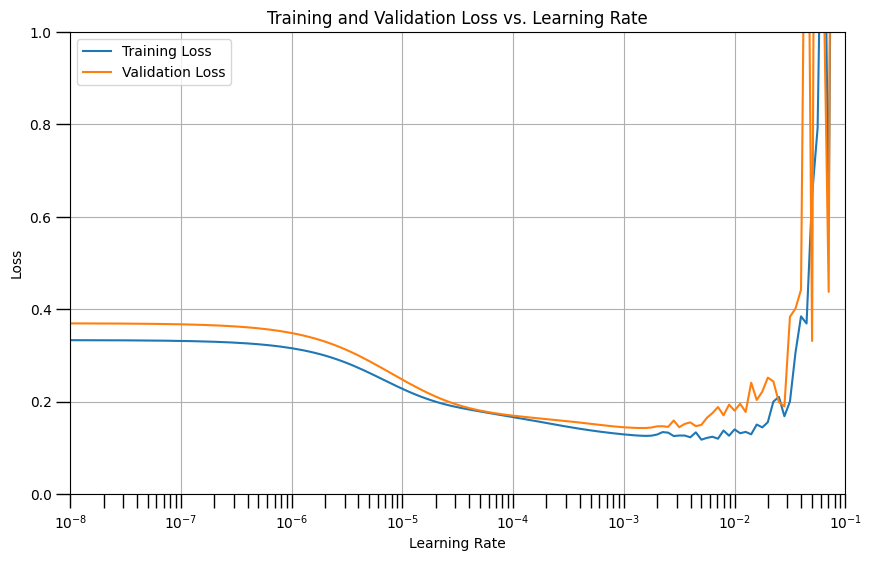

In [ ]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(200) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the training loss in log scale
plt.semilogx(lrs, history.history["loss"], label="Training Loss")

# Plot the validation loss in log scale
plt.semilogx(lrs, history.history["val_loss"], label="Validation Loss")

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-1, 0, 1])

# Add a legend
plt.legend()

# Add labels and title
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Training and Validation Loss vs. Learning Rate")

# Show the plot
plt.show()

In [ ]:
model_RNN=1

In [ ]:
# Build the model
from tensorflow.keras.layers import Bidirectional, SimpleRNN, Dense
model_RNN = tf.keras.models.Sequential([
    tf.keras.Input(shape=(window_size,1)),
    tf.keras.layers.SimpleRNN(50, return_sequences=True),
    tf.keras.layers.SimpleRNN(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Set the learning rate
learning_rate = 1e-3

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model_RNN.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae"])

# EarlyStopping callback with patience
early_stopping = EarlyStopping(
    monitor="val_loss",     # Monitor validation loss
    patience=5,             # Wait 5 epochs for improvement
    mode="min",             # Stop when val_loss is minimized
    verbose=1               # Print when training stops early
)

# Train the model with EarlyStopping
history = model_RNN.fit(
    x_train_windowed,
    validation_data=x_val_windowed,
    epochs=100,
    callbacks=[early_stopping]
)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.2342 - mae: 0.5513 - val_loss: 0.1772 - val_mae: 0.4251
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1240 - mae: 0.3445 - val_loss: 0.1534 - val_mae: 0.3793
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1080 - mae: 0.3169 - val_loss: 0.1460 - val_mae: 0.3529
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0926 - mae: 0.2699 - val_loss: 0.1459 - val_mae: 0.3527
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0898 - mae: 0.2673 - val_loss: 0.1458 - val_mae: 0.3494
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0901 - mae: 0.2688 - val_loss: 0.1525 - val_mae: 0.3633
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0868 - mae: 0.2487 - val_loss: 0.1461 - val_mae: 0.3490
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0862 - mae: 0.2624 - val_loss: 0.1459 - val_mae: 0.3482
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - lo

In [ ]:
# Initialize a list
forecast = []

# Use the model to predict data points per window size
for time in range(len(grouped_df0)-split2-window_size):
  forecast.append(model_RNN.predict(x_test_scaled[time:time + window_size][np.newaxis], verbose=0))

# Slice the points that are aligned with the validation set
#forecast = forecast[split_time - window_size:]

# Compare number of elements in the predictions and the validation set
print(f'length of the forecast list: {len(forecast)}')
print(f'shape of the validation set: {x_test.shape}')

length of the forecast list: 337
shape of the validation set: (367,)


In [ ]:
# Preview shapes after using the conversion and squeeze methods
print(f'shape after converting to numpy array: {np.array(forecast).shape}')
print(f'shape after squeezing: {np.array(forecast).squeeze().shape}')

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

shape after converting to numpy array: (337, 1, 1)
shape after squeezing: (337,)


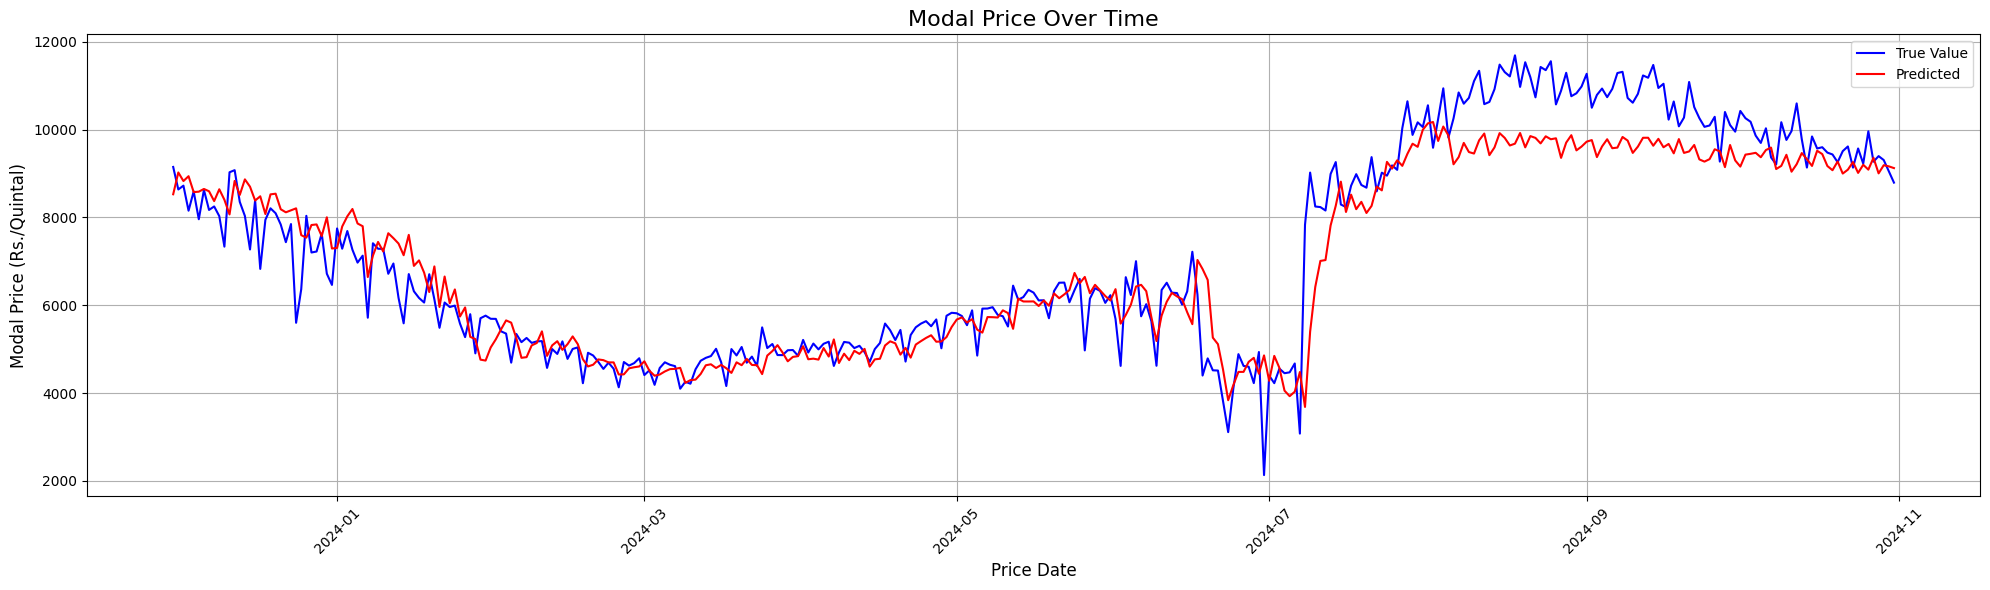

In [ ]:
# Reshape results to be 2D (as scaler.inverse_transform expects a 2D array)
results_reshaped = results.reshape(-1, 1)

# Plot the Modal Price against the Price Date
plt.figure(figsize=(20, 6))  # You can adjust the figure size
plt.plot(x_test_scaled_df.index[30:], scaler.inverse_transform(x_test_scaled_df.values[30:].reshape(-1, 1)), label='True Value', color='blue')

# Plot the predicted values (after reshaping)
plt.plot(x_test_scaled_df.index[30:], scaler.inverse_transform(results_reshaped), label='Predicted', color='red')

# Add title and labels
plt.title('Modal Price Over Time', fontsize=16)
plt.xlabel('Price Date', fontsize=12)
plt.ylabel('Modal Price (Rs./Quintal)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
# Instantiate metric objects
mse = tf.keras.metrics.MeanSquaredError()
mae = tf.keras.metrics.MeanAbsoluteError()

# Compute the metrics
true_values = x_test_scaled_df.values[30:].reshape(-1, 1)
predicted_values = results_reshaped

print("MSE:", mse(true_values, predicted_values).numpy())
print("MAE:", mae(true_values, predicted_values).numpy())

rnn_mse = mse(true_values, predicted_values).numpy()
rnn_mae = mae(true_values, predicted_values).numpy()

MSE: 0.079428196
MAE: 0.20304587


#LSTM

In [ ]:
# Build the Model
model_tune1 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(window_size, 1)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(1),
])

# Print the model summary
model_tune1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 30, 64)              │           8,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,601 (131.25 KB)

 Trainable params: 33,601 (131.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model_tune1.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model_tune1.fit(x_train_windowed, validation_data=x_val_windowed, epochs=200, callbacks=[lr_schedule])

Epoch 1/200
     14/Unknown 7s 54ms/step - loss: 0.1077

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - loss: 0.1178 - val_loss: 0.2858 - learning_rate: 1.0000e-08
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.1180 - val_loss: 0.2858 - learning_rate: 1.1220e-08
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.1183 - val_loss: 0.2858 - learning_rate: 1.2589e-08
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.1181 - val_loss: 0.2858 - learning_rate: 1.4125e-08
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.1184 - val_loss: 0.2858 - learning_rate: 1.5849e-08
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.1181 - val_loss: 0.2858 - learning_rate: 1.7783e-08
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.1184 - val_loss: 0.2858 - learning_rate: 1.9953e-08
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.1182 - val_loss: 0.2858 - learning_rate: 2.2387e-08
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.1181 - val_loss: 0.2858 - learning_ra

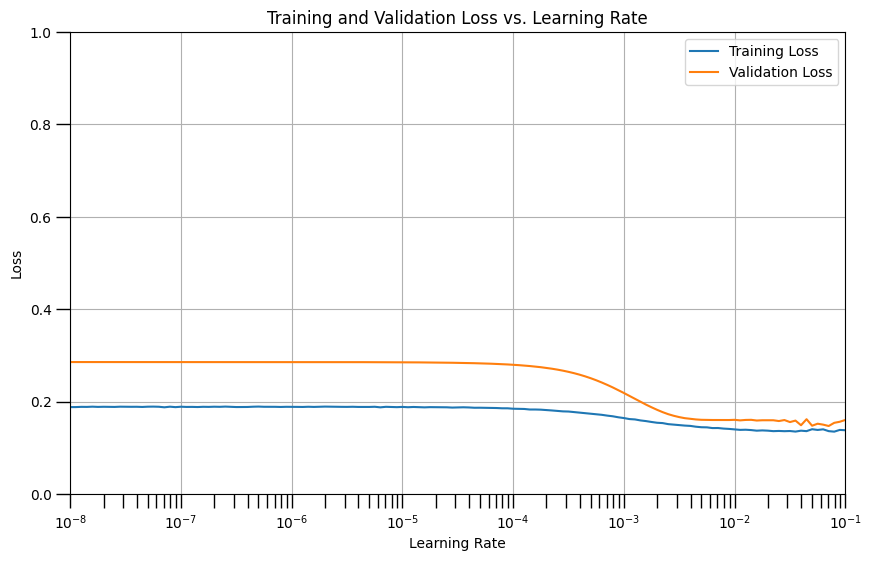

In [ ]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(200) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the training loss in log scale
plt.semilogx(lrs, history.history["loss"], label="Training Loss")

# Plot the validation loss in log scale
plt.semilogx(lrs, history.history["val_loss"], label="Validation Loss")

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-1, 0, 1])

# Add a legend
plt.legend()

# Add labels and title
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Training and Validation Loss vs. Learning Rate")

# Show the plot
plt.show()

In [ ]:
# Reset states generated by Keras
#tf.keras.backend.clear_session()

# Build the model
model_LSTM = tf.keras.models.Sequential([
    tf.keras.Input(shape=(window_size, 1)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(1),
])

# Set the learning rate
learning_rate = 1e-3

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model_LSTM.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# EarlyStopping callback with patience
early_stopping = EarlyStopping(
    monitor="val_loss",     # Monitor validation loss
    patience=5,             # Wait 5 epochs for improvement
    mode="min",             # Stop when val_loss is minimized
    verbose=1               # Print when training stops early
)

# Train the model with EarlyStopping
history = model_LSTM.fit(
    x_train_windowed,
    validation_data=x_val_windowed,
    epochs=100,
    callbacks=[early_stopping]
)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 0.1338 - mae: 0.3738 - val_loss: 0.3380 - val_mae: 0.6865
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.1289 - mae: 0.3631 - val_loss: 0.3214 - val_mae: 0.6650
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.1224 - mae: 0.3470 - val_loss: 0.3032 - val_mae: 0.6403
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.1171 - mae: 0.3331 - val_loss: 0.2849 - val_mae: 0.6142
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1130 - mae: 0.3220 - val_loss: 0.2679 - val_mae: 0.5891
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.1097 - mae: 0.3124 - val_loss: 0.2529 - val_mae: 0.5660
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.1070 - mae: 0.3041 - val_loss: 0.2401 - val_mae: 0.5453
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.1047 - mae: 0.2968 - val_loss: 0.2292 - val_mae: 0.5268
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - l

In [ ]:
type(x_test_scaled)

numpy.ndarray

In [ ]:
# Initialize a list
forecast = []

# Use the model to predict data points per window size
for time in range(len(grouped_df0)-split2-window_size):
  forecast.append(model_LSTM.predict(x_test_scaled[time:time + window_size][np.newaxis], verbose=0))

# Slice the points that are aligned with the validation set
#forecast = forecast[split_time - window_size:]

# Compare number of elements in the predictions and the validation set
print(f'length of the forecast list: {len(forecast)}')
print(f'shape of the validation set: {x_test.shape}')

length of the forecast list: 337
shape of the validation set: (367,)


In [ ]:
# Preview shapes after using the conversion and squeeze methods
print(f'shape after converting to numpy array: {np.array(forecast).shape}')
print(f'shape after squeezing: {np.array(forecast).squeeze().shape}')

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

shape after converting to numpy array: (337, 1, 1)
shape after squeezing: (337,)


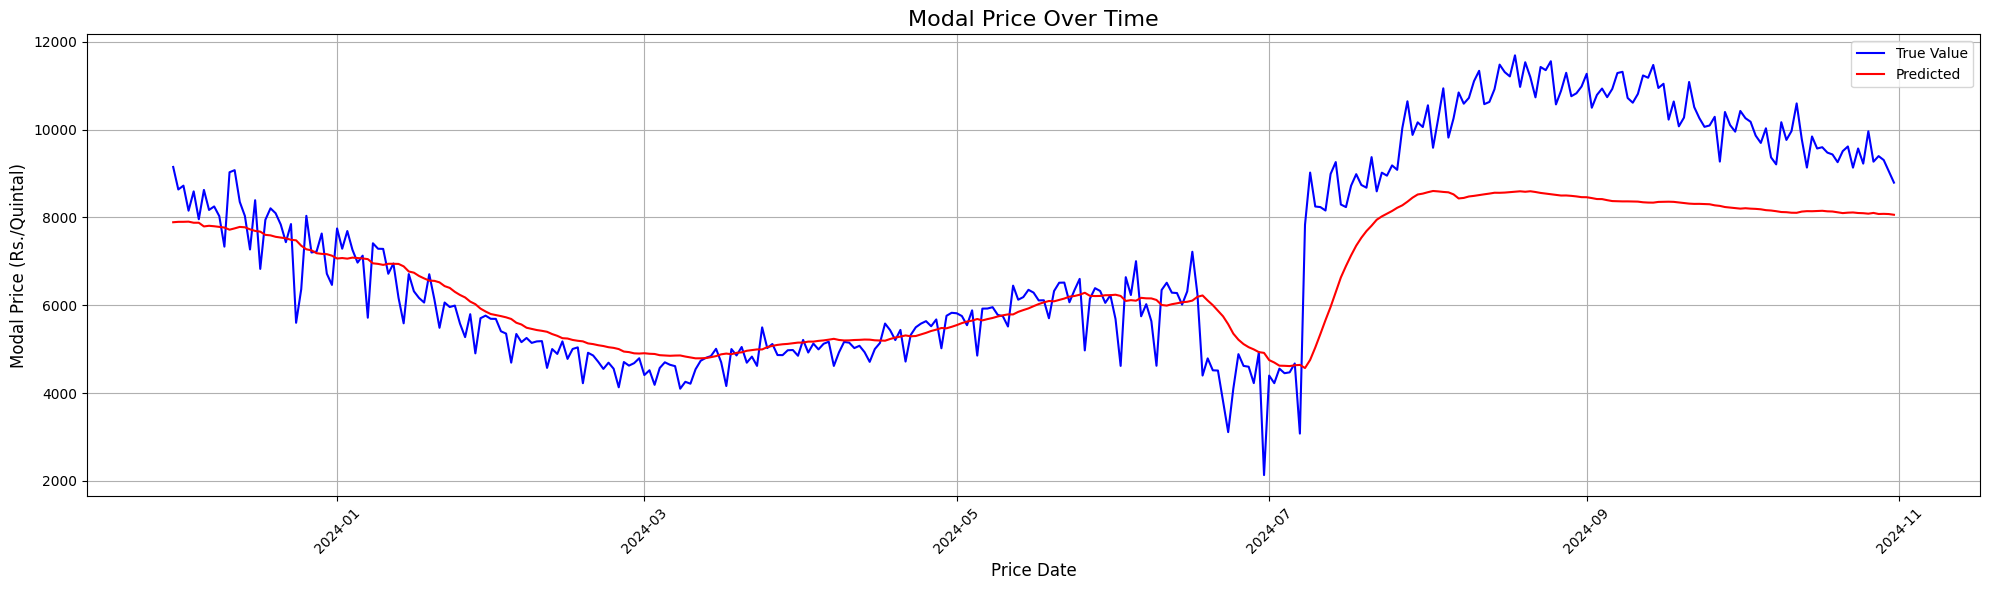

In [ ]:
# Reshape results to be 2D (as scaler.inverse_transform expects a 2D array)
results_reshaped = results.reshape(-1, 1)

# Plot the Modal Price against the Price Date
plt.figure(figsize=(20, 6))  # You can adjust the figure size
plt.plot(x_test_scaled_df.index[30:], scaler.inverse_transform(x_test_scaled_df.values[30:].reshape(-1, 1)), label='True Value', color='blue')

# Plot the predicted values (after reshaping)
plt.plot(x_test_scaled_df.index[30:], scaler.inverse_transform(results_reshaped), label='Predicted', color='red')

# Add title and labels
plt.title('Modal Price Over Time', fontsize=16)
plt.xlabel('Price Date', fontsize=12)
plt.ylabel('Modal Price (Rs./Quintal)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Prepare a DataFrame for Plotly
plot_df = pd.DataFrame({
    'Price Date': x_test_scaled_df.index[30:],
    'True Value': scaler.inverse_transform(x_test_scaled_df.values[30:].reshape(-1, 1)).flatten(),
    'Predicted': scaler.inverse_transform(results.reshape(-1, 1)).flatten()
})

# Create an interactive plot
fig = px.line(
    plot_df,
    x='Price Date',
    y=['True Value', 'Predicted'],
    labels={'value': 'Modal Price (Rs./Quintal)', 'variable': 'Legend'},
    title='Modal Price Over Time'
)

# Update layout for better aesthetics
fig.update_layout(
    title_font_size=16,
    xaxis_title='Price Date',
    yaxis_title='Modal Price (Rs./Quintal)',
    legend_title='Legend',
    xaxis=dict(tickangle=45),  # Rotate x-axis labels
    template='plotly_white'   # Clean white background
)

# Show the interactive plot
fig.show()


In [ ]:
# Instantiate metric objects
mse = tf.keras.metrics.MeanSquaredError()
mae = tf.keras.metrics.MeanAbsoluteError()

# Compute the metrics
true_values = x_test_scaled_df.values[30:].reshape(-1, 1)
predicted_values = results_reshaped

print("MSE:", mse(true_values, predicted_values).numpy())
print("MAE:", mae(true_values, predicted_values).numpy())

lstm_mse = mse(true_values, predicted_values).numpy()
lstm_mae = mae(true_values, predicted_values).numpy()

MSE: 0.21126357
MAE: 0.33470923


In [ ]:
model_name = ['rnn', 'lstm']
lst_mse = [rnn_mse, lstm_mse]
lst_mae = [rnn_mae, lstm_mae]

for i in range(len(model_name)):
    print(f'MSE dari {model_name[i]} adalah {lst_mse[i]}')
    print(f'MAE dari {model_name[i]} adalah {lst_mae[i]}')

smallest_mse = np.argmin(lst_mse)
smallest_mae = np.argmin(lst_mae)

print(f'Model terbaik adalah {model_name[smallest_mse]} berdasarkan MSE terkecil')
print(f'Model terbaik adalah {model_name[smallest_mae]} berdasarkan MAE terkecil')

MSE dari rnn adalah 0.07942819595336914
MAE dari rnn adalah 0.20304587483406067
MSE dari lstm adalah 0.21126356720924377
MAE dari lstm adalah 0.3347092270851135
Model terbaik adalah rnn berdasarkan MSE terkecil
Model terbaik adalah rnn berdasarkan MAE terkecil


Forecast

In [ ]:
numpy_grouped_df=grouped_df0.to_numpy()

In [ ]:
numpy_grouped_df_scaled = scaler.transform(numpy_grouped_df.reshape(-1,1))

In [ ]:
days = 240

In [ ]:
len(numpy_grouped_df)/240

5.529166666666667

Plot ulang RNN

In [ ]:
# Initialize lists for forecast
days = 240
forecast = []
result_forecast = numpy_grouped_df_scaled[-240:].tolist()  # Use the last 30 values as the starting point

# Flatten result_forecast if it contains nested lists
# Assuming numpy_grouped_df_scaled[-30:] is a 2D array or list of lists
result_forecast = [item[0] if isinstance(item, list) else float(item) for item in result_forecast]

# Forecast for 365 days
for _ in range(days):
    # Prepare input for the model
    input_data = np.array(result_forecast[-240:]).reshape(1, 240, 1)  # Reshape correctly

    # Predict and extract the scalar value
    prediksi = model_RNN.predict(input_data)[0][0]  # Extract scalar from prediction array

    # Append the prediction
    forecast.append(prediksi)  # For final forecast output
    result_forecast.append(prediksi)  # For generating subsequent predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━

In [ ]:
last_30_df = pd.DataFrame(numpy_grouped_df[-240:], columns=[grouped_df0.name],index=grouped_df0[-240:].index)

In [ ]:
# Assume forecast contains the 30 predicted values
import pandas as pd

# Create a new datetime index for the next 30 days
new_dates = pd.date_range(start=last_30_df.index[-1] + pd.Timedelta(days=1), periods=days)

# Create a new DataFrame with the forecasted values
forecast_df = pd.DataFrame({'Modal Price (Rs./Quintal)': (scaler.inverse_transform(np.array(forecast).reshape(-1,1)).flatten())}, index=new_dates)

# Concatenate the existing DataFrame with the forecasted DataFrame
extended_df = pd.concat([last_30_df, forecast_df])

# Display the extended DataFrame
print(len(extended_df))

480


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Concatenate the actual and forecast DataFrames into a single DataFrame
combined_df = pd.concat([last_30_df, forecast_df])

# Create a figure
fig = go.Figure()


# Add a trace for the combined actual and forecast data (continuous line)
fig.add_trace(go.Scatter(
    x=extended_df.index,  # Use the combined index of both actual and forecast
    y=extended_df['Modal Price (Rs./Quintal)'],
    mode='lines',  # Line plot
    name='Predicted Price',  # Label for combined data
    line=dict(color='red')  # Blue color for the forecasted data
))

# Add a trace for the last 30 actual values
fig.add_trace(go.Scatter(
    x=last_30_df.index,  # Only the index for the last 30 actual values
    y=last_30_df['Modal Price (Rs./Quintal)'],
    mode='lines',  # Line plot
    name='True Price',  # Label for the last 30 actual data
    line=dict(color='blue')  # Green color for actual data
))


# Update layout for better aesthetics
fig.update_layout(
    title='Modal Price Over Time',
    title_font_size=16,
    xaxis_title='Price Date',
    yaxis_title='Modal Price (Rs./Quintal)',
    legend_title='Legend',
    xaxis=dict(tickangle=45),  # Rotate x-axis labels
    template='plotly_white'   # Clean white background
)

# Show the interactive plot
fig.show()


Plot ulang LSTM

In [ ]:
# Initialize lists for forecast
days = 1*240
forecast = []
result_forecast = numpy_grouped_df_scaled[-1*240:].tolist()  # Use the last 30 values as the starting point

# Flatten result_forecast if it contains nested lists
# Assuming numpy_grouped_df_scaled[-30:] is a 2D array or list of lists
result_forecast = [item[0] if isinstance(item, list) else float(item) for item in result_forecast]

# Forecast for 365 days
for _ in range(days):
    # Prepare input for the model
    input_data = np.array(result_forecast[-1*240:]).reshape(1, 1*240, 1)  # Reshape correctly

    # Predict and extract the scalar value
    prediksi = model_LSTM.predict(input_data)[0][0]  # Extract scalar from prediction array

    # Append the prediction
    forecast.append(prediksi)  # For final forecast output
    result_forecast.append(prediksi)  # For generating subsequent predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━

In [ ]:
last_30_df = pd.DataFrame(numpy_grouped_df[-240:], columns=[grouped_df0.name],index=grouped_df0[-240:].index)

In [ ]:
# Assume forecast contains the 30 predicted values
import pandas as pd

# Create a new datetime index for the next 30 days
new_dates = pd.date_range(start=last_30_df.index[-1] + pd.Timedelta(days=1), periods=days)

# Create a new DataFrame with the forecasted values
forecast_df = pd.DataFrame({'Modal Price (Rs./Quintal)': (scaler.inverse_transform(np.array(forecast).reshape(-1,1)).flatten())}, index=new_dates)

# Concatenate the existing DataFrame with the forecasted DataFrame
extended_df = pd.concat([last_30_df, forecast_df])

# Display the extended DataFrame
print(len(extended_df))

480


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Concatenate the actual and forecast DataFrames into a single DataFrame
combined_df = pd.concat([last_30_df, forecast_df])

# Create a figure
fig = go.Figure()


# Add a trace for the combined actual and forecast data (continuous line)
fig.add_trace(go.Scatter(
    x=extended_df.index,  # Use the combined index of both actual and forecast
    y=extended_df['Modal Price (Rs./Quintal)'],
    mode='lines',  # Line plot
    name='Predicted Price',  # Label for combined data
    line=dict(color='red')  # Blue color for the forecasted data
))

# Add a trace for the last 30 actual values
fig.add_trace(go.Scatter(
    x=last_30_df.index,  # Only the index for the last 30 actual values
    y=last_30_df['Modal Price (Rs./Quintal)'],
    mode='lines',  # Line plot
    name='True Price',  # Label for the last 30 actual data
    line=dict(color='blue')  # Green color for actual data
))


# Update layout for better aesthetics
fig.update_layout(
    title='Modal Price Over Time',
    title_font_size=16,
    xaxis_title='Price Date',
    yaxis_title='Modal Price (Rs./Quintal)',
    legend_title='Legend',
    xaxis=dict(tickangle=45),  # Rotate x-axis labels
    template='plotly_white'   # Clean white background
)

# Show the interactive plot
fig.show()


Save model

In [ ]:
import joblib

# Assuming `scaler` is your StandardScaler object
joblib.dump(scaler, 'scaler_grape.pkl')

#save model
model_RNN.save('best_grape_model.h5')

In [6]:
#save average price
grouped_df0.to_excel('grape_avg_price.xlsx')